### Improving the Practical Example 

In [2]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the data

In [3]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('Real-life-example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Step 1: Preprocessing

#### Exploring the descriptive statistics of the variables

In [5]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')
# Note that categorical variables don't have some types of numerical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [7]:
# In this attempt on improving our ML model, we will create the regression without 'Registration'
data = raw_data.drop(['Registration'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


### Dealing with missing values

In [8]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
Model            0
dtype: int64

In [77]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,2011,Rav 4
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.00,sedan,35,1.60,Petrol,2014,Corolla
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,1985,520


In [10]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000,NaN


### Exploring the PDFs

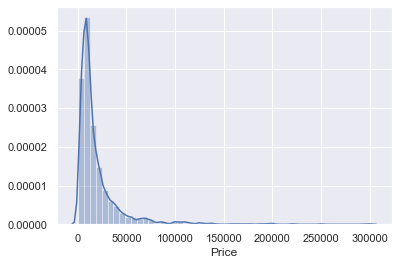

In [11]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [13]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.95)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3823,3823.000000,3823,3823.000000,3823.000000,3823,3823.000000,3823
unique,7,NaN,6,NaN,NaN,4,NaN,294
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,872,NaN,1491,NaN,NaN,1740,NaN,188
mean,NaN,14911.796798,NaN,171.095998,2.715250,NaN,2005.934868,NaN
std,NaN,12198.369515,NaN,99.269432,5.052605,NaN,6.565549,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,2002.000000,NaN
50%,NaN,10900.000000,NaN,163.000000,2.000000,NaN,2007.000000,NaN
75%,NaN,19150.000000,NaN,234.000000,3.000000,NaN,2011.000000,NaN


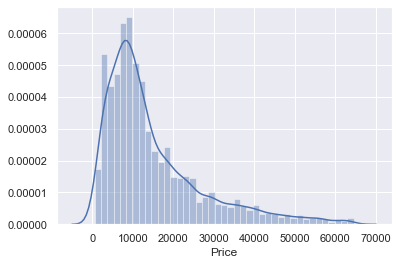

In [14]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

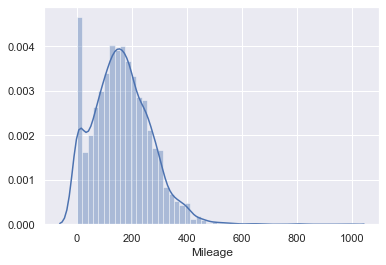

In [15]:
sns.distplot(data_no_mv['Mileage'])

In [16]:
q = data_1['Mileage'].quantile(0.95)
data_2 = data_1[data_1['Mileage']<q]

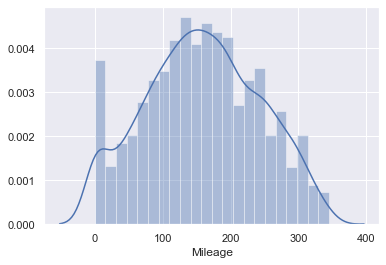

In [17]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

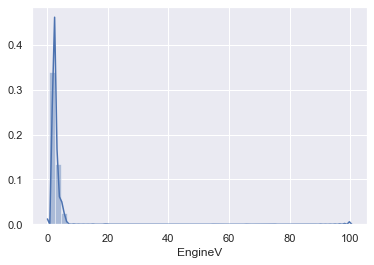

In [18]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_no_mv['EngineV'])

In [22]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

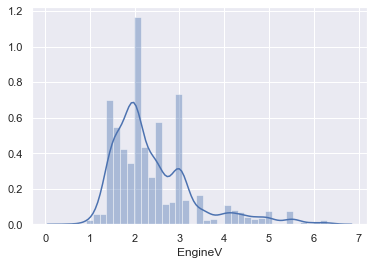

In [23]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

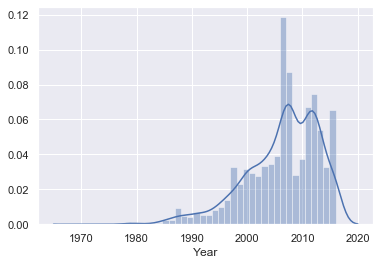

In [24]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

In [25]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

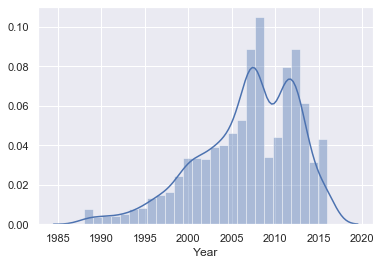

In [26]:
# Here's the new result
sns.distplot(data_4['Year'])

In [27]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [28]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
count,3561,3561.000000,3561,3561.000000,3561.000000,3561,3561.000000,3561
unique,7,NaN,6,NaN,NaN,4,NaN,274
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,E-Class
freq,816,NaN,1349,NaN,NaN,1621,NaN,160
mean,NaN,15597.438447,NaN,157.987644,2.405251,NaN,2006.755687,NaN
std,NaN,12290.337510,NaN,83.529009,0.928208,NaN,5.682653,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000,NaN
25%,NaN,7300.000000,NaN,98.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.000000,NaN,2008.000000,NaN
75%,NaN,20300.000000,NaN,220.000000,3.000000,NaN,2011.000000,NaN


### Checking the OLS assumptions 

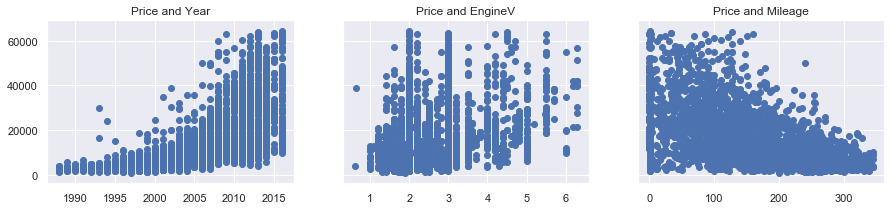

In [29]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

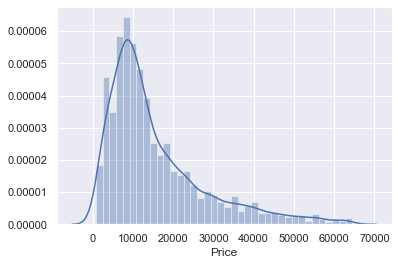

In [30]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions with log transformation

In [31]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320,8.342840
1,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,2006,A6,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,2012,Megane,9.287209
...,...,...,...,...,...,...,...,...,...
3556,Renault,6800.0,sedan,152,1.6,Petrol,2007,Megane,8.824678
3557,Volkswagen,11500.0,van,163,2.5,Diesel,2008,T5 (Transporter),9.350102
3558,Toyota,17900.0,sedan,35,1.6,Petrol,2014,Corolla,9.792556
3559,BMW,6500.0,sedan,1,3.5,Petrol,1999,535,8.779557


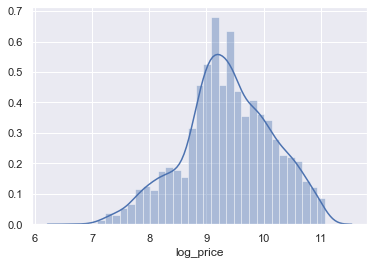

In [78]:
sns.distplot(data_cleaned['log_price'])

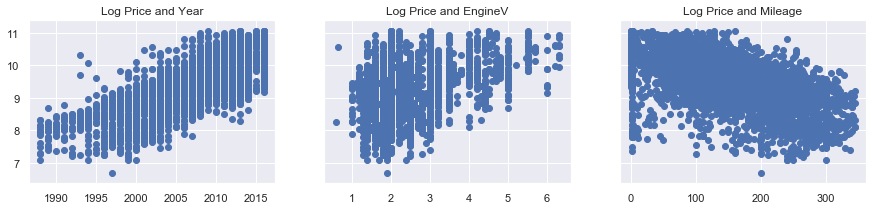

In [32]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [33]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320,8.342840
1,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,2006,A6,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,2012,Megane,9.287209


In [34]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [35]:
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,1991,320,8.342840
1,Audi,crossover,240,4.2,Petrol,2007,Q7,10.043249
2,Toyota,crossover,120,2.0,Petrol,2011,Rav 4,9.814656
3,Audi,vagon,200,2.7,Diesel,2006,A6,9.560997
4,Renault,vagon,193,1.5,Diesel,2012,Megane,9.287209


### Checking for Multicollinearity VIF(variance inflation factor)

In [36]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'Model', 'log_price'], dtype=object)

In [37]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [38]:
# Exploring the result
vif

,VIF,Features
0,4.576149,Mileage
1,10.531507,Year
2,7.757061,EngineV


In [39]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### Create dummy variables

In [40]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [41]:
# Here is the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200,2.7,9.560997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,193,1.5,9.287209,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Quick rearange 

In [42]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Model_100', 'Model_11',
       'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model

#### Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies

In [43]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Model_100', 'Model_11',
       'Model_116', 'Model_118', 'Model_120', 'Model_19', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150',
       'Model_A 170', 'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 500', 'Model_G 55 AMG', 'Model_G 63 AMG',
       'Model_GL 320', 'Model_GL 350', 'Model_GL 420', 'Model_GL 450',
       'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class', 'Model_GLK 220',
       'Model_GLK 300', 'Model_Galant', 'Model_Golf GTI', 'Model_Golf II',
       'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Grandis',
       'Model_Hiace', 'Model_Highlander', 'Model_Hilux', 'Model_I3',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_ML 250', 'Model_ML 270',
       'Model_ML 280', 'Model_ML 320', 'Model_ML 350', 'Model_ML 400',
       'Model_ML 430', 'Model_ML 500', 'Model_ML 550', 'Model_ML 63 AMG',
       'Model_Master', 'Model_Matrix', 'Model_Megane', 'Model_Modus',
       'Model_Multivan', 'Model_New Beetle', 'Model_Outlander',
       'Model_Outlander XL', 'Model_Pajero', 'Model_Pajero Pinin',
       'Model_Pajero Sport', 'Model_Pajero Wagon', 'Model_Passat B3',
       'Model_Passat B4', 'Model_Passat B5', 'Model_Passat B6',
       'Model_Passat B7', 'Model_Passat B8', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Pointer', 'Model_Polo', 'Model_Previa',
       'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320',
       'Model_R8', 'Model_Rav 4', 'Model_S 140', 'Model_S 250',
       'Model_S 300', 'Model_S 320', 'Model_S 350', 'Model_S 400',
       'Model_S 430', 'Model_S 500', 'Model_S 550', 'Model_S 600',
       'Model_S 63 AMG', 'Model_S4', 'Model_S5', 'Model_S8',
       'Model_SL 500 (550)', 'Model_SL 55 AMG', 'Model_SLK 200',
       'Model_SLK 350', 'Model_Sandero', 'Model_Sandero StepWay',
       'Model_Scenic', 'Model_Scion', 'Model_Scirocco', 'Model_Sequoia',
       'Model_Sharan', 'Model_Sienna', 'Model_Smart', 'Model_Space Star',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3',
       'Model_Z4']

In [44]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.560997,200,2.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.287209,193,1.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

### Declare the inputs and the targets

In [45]:
# The target(s) (dependent variable y) is 'log price'
targets = data_preprocessed['log_price']

# The inputs x, are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

Feature Scaling or Standardization:

It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm

### scaler 

- contains all standardization info

In [48]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
# scaler.fit : is the scalling mechanism 
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
# Scale the features and store them in a new variable (the actual scaling procedure)
# here we apply the mechanism through 'scaler.transform(the new data)'
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [50]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [51]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

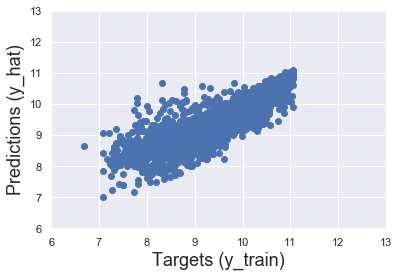

In [79]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

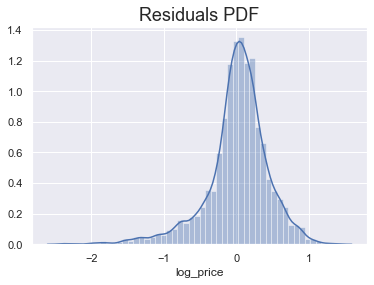

In [54]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
# Residuals - the difference between the targets and the predictions
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [55]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.6957186897122973

### Calculate the Adjusted R-squared


In [56]:
def adjusted_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [57]:
r2_adj = adjusted_r2(x_train,y_train)
r2_adj

0.6613413251019978

### Feature Selection

In [74]:
from sklearn.feature_selection import f_regression

In [75]:
f_regression(x_train,y_train)

/Users/veronicatimofte/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)


(array([1.16786204e+03, 4.73451427e+02, 1.19497339e+01, 2.59789920e+01,
        9.69087860e+00, 1.36838722e+02, 7.91998342e+01, 2.01009064e+01,
        4.48721816e+01, 8.15216130e+00, 2.68874292e+01, 8.39296713e+01,
        4.31083213e+01, 4.50987873e+00, 1.73902237e+00, 8.33624425e+00,
        1.41220328e+01, 5.64033999e+00, 1.10655050e-04, 5.87716079e-02,
        2.32799719e+00, 7.65907508e+00, 5.25870245e+00, 2.12967571e+00,
        2.89988436e+00, 5.39375268e-01, 3.44843136e+00, 9.76998030e+00,
        3.03511764e+01, 1.60132054e+01, 5.71677436e-01, 1.27870577e-04,
        1.24104178e-01, 1.90463078e-01, 1.07841737e+00, 3.68802488e+00,
                   nan, 2.69732311e+00, 3.10424223e+00, 5.24691313e+00,
        8.70013384e+00, 9.81779839e-01, 3.11950362e+00, 2.93150924e+01,
        3.45234445e-01, 2.66894497e+00, 4.93785446e+00, 1.08307230e+00,
        3.79072704e-01, 3.85396161e+00,            nan, 3.46835152e+00,
        1.37018924e+00, 6.68500654e-01, 7.38983445e-01, 5.831645

In [76]:
p_value = f_regression(x_train,y_train)[1]
p_value.round(3)
p_value

/Users/veronicatimofte/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)


array([8.90022739e-215, 3.13079112e-097, 5.54563533e-004, 3.67745560e-007,
       1.87024444e-003, 6.59128004e-031, 9.77476419e-019, 7.63668829e-006,
       2.52505969e-011, 4.33213012e-003, 2.30772095e-007, 9.54326112e-020,
       6.13306252e-011, 3.37856669e-002, 1.87368850e-001, 3.91548955e-003,
       1.74765379e-004, 1.76177169e-002, 9.91607729e-001, 8.08465573e-001,
       1.27176384e-001, 5.68528109e-003, 2.19098829e-002, 1.44581678e-001,
       8.86950966e-002, 4.62752255e-001, 6.34150759e-002, 1.79172931e-003,
       3.92699002e-008, 6.45067243e-005, 4.49655694e-001, 9.90978516e-001,
       7.24651198e-001, 6.62564586e-001, 2.99140089e-001, 5.49043016e-002,
                   nan, 1.00627362e-001, 7.81959081e-002, 2.20585394e-002,
       3.20780221e-003, 3.21844020e-001, 7.74675342e-002, 6.66401144e-008,
       5.56869885e-001, 1.02434441e-001, 2.63529708e-002, 2.98099678e-001,
       5.38149160e-001, 4.97258854e-002,             nan, 6.26565979e-002,
       2.41877377e-001, 4

### Finding weights and bias

In [58]:
# Obtain the bias (intercept) of the regression
reg.intercept_

-158733841785.837

In [59]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-3.70688710e-01,  3.64210577e-03,  9.58442866e+09,  1.01585212e+10,
       -2.84384784e+12, -1.65776556e+12, -8.20825671e+11, -9.57340117e+11,
       -4.83047105e-02, -1.26647949e-02, -4.64477539e-02, -5.26771545e-02,
       -3.28369141e-02, -3.02124023e-02, -2.86560059e-02, -3.75976562e-02,
        1.40872962e+09,  8.57773882e+10,  2.71911621e-02,  2.99148560e-02,
       -1.50909424e-02,  1.21290507e+11, -2.50244141e-03,  8.85009766e-03,
        8.69750977e-04,  2.10571289e-02,  0.00000000e+00,  1.04522705e-02,
        2.09503174e-02,  7.88116455e-02,  8.01086426e-03,  2.76184082e-02,
        4.22363281e-02,  4.56390381e-02,  3.40423584e-02,  2.85644531e-02,
        1.79151772e+12,  4.08972207e+10,  1.49917603e-02,  5.16128540e-02,
        1.69372559e-01,  4.80804443e-02,  4.11987305e-03,  6.47888184e-02,
        6.19659424e-02,  1.08154297e-01,  8.54949951e-02,  3.83911133e-02,
        2.28576660e-02,  3.14025879e-02, -2.45781548e+12,  3.31878662e-02,
        2.82745361e-02,  

In [60]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.706887e-01
1,EngineV,3.642106e-03
2,Brand_BMW,9.584429e+09
3,Brand_Mercedes-Benz,1.015852e+10
4,Brand_Mitsubishi,-2.843848e+12
...,...,...
284,Model_X6,1.587334e-01
285,Model_X6 M,-1.031912e+11
286,Model_Yaris,1.527437e+11
287,Model_Z3,-5.859375e-03


In [61]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

### Testing

In [62]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

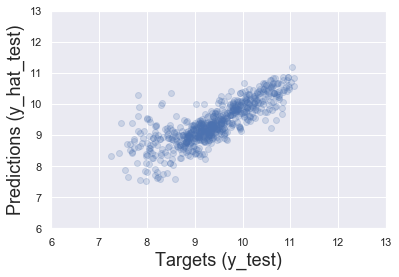

In [63]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [66]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

/Users/veronicatimofte/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


,Prediction
0,11308.534536
1,22931.876376
2,9791.799583
3,15146.871931
4,10005.362366


In [67]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,11308.534536,NaN
1,22931.876376,NaN
2,9791.799583,NaN
3,15146.871931,NaN
4,10005.362366,NaN
...,...,...
708,18656.004677,NaN
709,11161.788298,NaN
710,8207.362245,NaN
711,11401.403025,NaN


In [68]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    9.159047
1    8.318742
2    9.287301
3    9.729134
4    9.159047
Name: log_price, dtype: float64

In [69]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,11308.534536,9500.0
1,22931.876376,4100.0
2,9791.799583,10800.0
3,15146.871931,16800.0
4,10005.362366,9500.0
...,...,...
708,18656.004677,14300.0
709,11161.788298,7700.0
710,8207.362245,10100.0
711,11401.403025,11500.0


In [70]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [71]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,11308.534536,9500.0,-1808.534536,19.037206
1,22931.876376,4100.0,-18831.876376,459.314058
2,9791.799583,10800.0,1008.200417,9.335189
3,15146.871931,16800.0,1653.128069,9.840048
4,10005.362366,9500.0,-505.362366,5.319604
...,...,...,...,...
708,18656.004677,14300.0,-4356.004677,30.461571
709,11161.788298,7700.0,-3461.788298,44.958290
710,8207.362245,10100.0,1892.637755,18.738988
711,11401.403025,11500.0,98.596975,0.857365


In [72]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,7.130000e+02,713.000000,7.130000e+02,713.000000
mean,inf,16191.941248,-inf,inf
std,NaN,12899.057346,NaN,NaN
min,0.000000e+00,1400.000000,-inf,0.000111
25%,7.476538e+03,7350.000000,-1.778913e+03,10.358605
50%,1.073943e+04,11700.000000,6.352800e+02,23.265218
75%,1.866626e+04,21000.000000,3.344154e+03,40.877076
max,inf,64500.000000,6.300000e+04,inf


In [73]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
410,5900.01,5900.00,-0.01,0.00
345,11506.62,11500.00,-6.62,0.06
433,27983.77,28000.00,16.23,0.06
141,51537.61,51500.00,-37.61,0.07
58,15527.85,15500.00,-27.85,0.18
372,7285.54,7300.00,14.46,0.20
66,13153.81,13200.00,46.19,0.35
541,9216.53,9250.00,33.47,0.36
315,10958.27,10999.00,40.73,0.37
422,10858.07,10900.00,41.93,0.38
